In [2]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [3]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [4]:
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Dropout

In [5]:
# conv
from keras import layers
from keras import models
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

import os, shutil

In [6]:
original_dataset_dir = 'Downloads/dogs-vs-cats/train1' # uncompressed data stored
base_dir = 'Downloads/cats_and_dogs_small'   # will be substitued to train, test, validation in this directory
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)



In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)  # copy from original to train
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)



In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)



In [9]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

NameError: name 'model' is not defined

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])



train_datagen = ImageDataGenerator(rescale = 1./255,    # data transformation leading to more images
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 32,
                                                   class_mode = 'binary')


validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150, 150),
                                                       batch_size = 32,
                                                       class_mode = 'binary')





history = model.fit_generator(train_generator,
                             steps_per_epoch = 5,
                             epochs = 2,
                             validation_data = validation_generator,
                             validation_steps = 50)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/2
5/5 [==============================] - 32s 6s/step - loss: 0.6878 - acc: 0.5562 - val_loss: 0.6454 - val_acc: 0.4975
Epoch 2/2
5/5 [==============================] - 32s 6s/step - loss: 0.6862 - acc: 0.5688 - val_loss: 0.7073 - val_acc: 0.5090


In [1]:
conda clean -tipsy

    Use 'conda build purge-all' to remove source cache files.
Cache location: /Users/syem/anaconda3/pkgs
Will remove the following tarballs:

/Users/syem/anaconda3/pkgs
--------------------------
clang_osx-64-4.0.1-h1ce6c1d_17.tar.bz2       145 KB
clangxx-4.0.1-1.tar.bz2                      263 KB
openssl-1.1.1b-h1de35cc_1.tar.bz2            3.5 MB
pystan-2.17.1.0-py37h051e8ed_1004.tar.bz2    14.2 MB
conda-4.7.12-py37_0.tar.bz2                  3.0 MB
lunardate-0.2.0-py_0.tar.bz2                  21 KB
convertdate-2.2.1-pyh9f0ad1d_0.tar.bz2        33 KB
ipython-7.4.0-py37h39e3cac_0.tar.bz2         1.1 MB
compiler-rt-4.0.1-hcfea43d_1.tar.bz2         1.2 MB
clangxx_osx-64-4.0.1-h22b1bf0_17.tar.bz2     146 KB
llvm-4.0.1-1.tar.bz2                       136.6 MB
python_abi-3.7-1_cp37m.tar.bz2                 4 KB
llvm-lto-tapi-4.0.1-1.tar.bz2               11.9 MB
cctools-895-1.tar.bz2                        1.9 MB
clang-4.0.1-1.tar.bz2                       73.9 MB
holidays-0.10.2-pyh9f0a

In [11]:
from keras.applications import VGG16

# pretrained convet

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))


58892288/58889256 [==============================] - 25s 0us/step


In [15]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape= (sample_count, 4, 4, 512))  # zeros will be filled with values extracted
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size = (150, 150),      # data augmentation not used, no new data
                                           batch_size = batch_size,
                                           class_mode = 'binary')
    
    i = 0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch # fill zeros with values
        labels[i * batch_size: (i+1) * batch_size] = labels_batch
        
        i += 1
        
        if i * batch_size >= sample_count:
            break
            
    return features, labels
        
train_features, train_labels = extract_features(train_dir, 2000) # 2000 training, sample count
validation_features, validation_labels = extract_features(validation_dir, 1000) # validation 1000
test_features, test_labels = extract_features(test_dir, 1000) # testing 1000





Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
# flatten the data in (4,4,512) image data form before feeding it to dense layer
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))


In [25]:
from keras import models
from keras import layers
from keras import optimizers

model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.RMSprop(lr = 2e-5), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(train_features, train_labels, epochs = 30, batch_size = 20, 
                    validation_data = (validation_features, validation_labels), )




Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6179 - acc: 0.6515 - val_loss: 0.4486 - val_acc: 0.8360
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4355 - acc: 0.7985 - val_loss: 0.3651 - val_acc: 0.8500
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3557 - acc: 0.8525 - val_loss: 0.3242 - val_acc: 0.8840
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3183 - acc: 0.8680 - val_loss: 0.3004 - val_acc: 0.8810
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2879 - acc: 0.8850 - val_loss: 0.2816 - val_acc: 0.8930
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2634 - acc: 0.8995 - val_loss: 0.2734 - val_acc: 0.8960
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2479 - acc: 0.9080 - val_loss: 0.2726 - val_acc: 0.8940
Epoch 8/30
200

<Figure size 432x288 with 0 Axes>

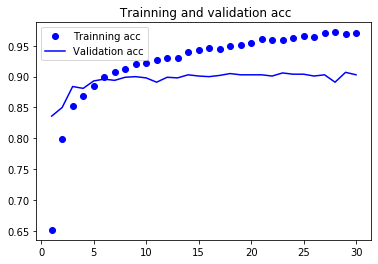

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Trainning acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title(' Trainning and validation acc')
plt.legend()
plt.figure()


In [29]:
# convnet model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [30]:
# freeze the layer so that weights arent updated during training, due to large number of parameters
print('Trainable weights before freezing:', len(model.trainable_weights))
conv_base.trainable = False
print('Trainable weights after freezing', len(model.trainable_weights))


Trainable weights before freezing: 30
 trainable weights after freezing 4


In [32]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_dataget = ImageDataGenerator(rescale = 1./255,     # data augmentation, transformin image leads to more data,
                                            # no specific values, randomly applied to transform, reduce overfitting
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)



train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150), # resize image to 150 X 150
                                                   batch_size = 20,
                                                   class_mode = 'binary')


validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')


model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-5),
             metrics = ['accuracy'])


history = model.fit_generator(train_generator,
                             steps_per_epoch = 5,
                             epochs = 2,
                             validation_data = validation_generator,
                             validation_steps = 2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/2
5/5 [==============================] - 23s 5s/step - loss: 0.7010 - accuracy: 0.5400 - val_loss: 0.7004 - val_accuracy: 0.5500
Epoch 2/2
5/5 [==============================] - 25s 5s/step - loss: 0.6969 - accuracy: 0.5300 - val_loss: 0.6979 - val_accuracy: 0.4750
